# Cancer Dataset

In [220]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.display import display # Allows the use of display() for DataFrames

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [221]:
# Import libraries
import sys
# Add path to the fast_ai library
sys.path.insert(0, "../../../../fastai/old/")
import json
# Import supplementary visualizations code visuals.py
import visuals as vs
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
# Read cancer data
cancer_data = pd.read_csv("cancer_data.csv", header=0)
print ("Cancer data read successfully!")
cancer_data.head()

Cancer data read successfully!


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [223]:
n_cases = cancer_data.shape[0]

n_features = len(list(cancer_data.columns[:-1]))

n_malignant = cancer_data[cancer_data.diagnosis == 'M'].shape[0]

n_benign = cancer_data[cancer_data.diagnosis == 'B'].shape[0]

malignancy_rate = (float(n_malignant)/cancer_data.shape[0]) * 100

# Print the results
print ("Total number of cases: {}".format(n_cases))
print ("Number of features: {}".format(n_features))
print ("Number of cases which were positive: {}".format(n_malignant))
print ("Number of students which were negative: {}".format(n_benign))
print ("Malignancy rate in patients: {:.2f}%".format(malignancy_rate))

Total number of cases: 569
Number of features: 32
Number of cases which were positive: 212
Number of students which were negative: 357
Malignancy rate in patients: 37.26%


Text(0.5,1,'Cancer Dataset')

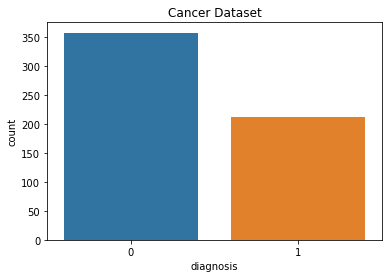

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Plotting frequency of cancer types (in our dataset)
sns.countplot(cancer_data['diagnosis'],label="Count").set_title('Cancer Dataset')

In [225]:
cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [226]:
final_cancer_data = cancer_data.iloc[:, 1:]
y = cancer_data.iloc[:, 0:1]

In [227]:
x = final_cancer_data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_cancer_data = pd.DataFrame(x_scaled)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(norm_cancer_data, y, test_size=0.2, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train_cancer.shape[0]))
print ("Testing set has {} samples.".format(X_test_cancer.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


# Wine Dataset

In [529]:
wine_data = pd.read_csv("winequality-red.csv", header=0)
print ("Wine data read successfully!")
wine_data.head()

Wine data read successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [530]:
n_cases = wine_data.shape[0]
n_features = len(list(wine_data.columns[:-1]))

# Print the results
print ("Total number of cases: {}".format(n_cases))
print ("Number of features: {}".format(n_features))

Total number of cases: 1599
Number of features: 11


Text(0.5,1,'Wine Dataset')

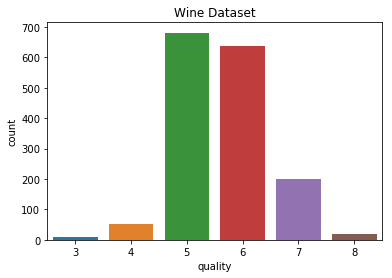

In [531]:
# Plotting frequency of cancer types (in our dataset)
sns.countplot(wine_data['quality'],label="Count").set_title('Wine Dataset')

In [532]:
from sklearn.preprocessing import MinMaxScaler
final_wine_data = wine_data.iloc[:, :-1]
y_wine = wine_data.iloc[:, -1:]

x = final_wine_data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_wine_data = pd.DataFrame(x_scaled)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(norm_wine_data, y_wine, test_size=0.2, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train_wine.shape[0]))
print ("Testing set has {} samples.".format(X_test_wine.shape[0]))

Training set has 1279 samples.
Testing set has 320 samples.


## Experiment 1

### K-means

In [514]:
def get_best_kmeans_cluster(train, predict_min_count, predict_max_count):
    best_score = -1
    df = []
    for n in range(predict_min_count, predict_max_count):
        clusterer = KMeans(n_clusters=n, random_state=0).fit(train)
        preds = clusterer.predict(train)
        score = silhouette_score(train, clusterer.labels_)
        df.append({'number_of_clusters': n, 'silhouette_score': score})

        if score > best_score:
            best_score = score
            best_number_clusters = n
            best_clusterer = clusterer
            
    return best_score, best_number_clusters, best_clusterer, df

In [401]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_cancer, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.38520937368685765


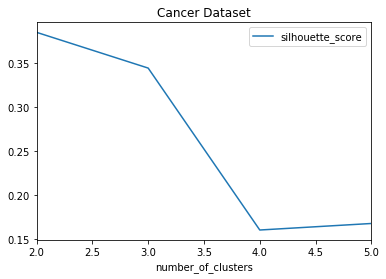

In [402]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

In [515]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_wine, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 6 clusters is 0.2062096478859651


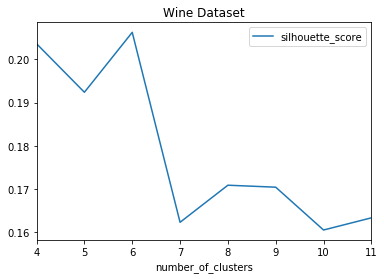

In [516]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

### Expectation Maximisation

In [405]:
from sklearn.mixture import GaussianMixture
def get_best_em_cluster(train, predict_min_count, predict_max_count):
    best_score = -1
    df = []
    for n in range(predict_min_count, predict_max_count):
        clusterer = GaussianMixture(n_components=n, random_state=0).fit(train)
        preds = clusterer.predict(train)
        score = silhouette_score(train, preds)
        df.append({'number_of_clusters': n, 'silhouette_score': score})
        if score > best_score:
            best_score = score
            best_number_clusters = n
            best_clusterer = clusterer
            
    return best_score, best_number_clusters, best_clusterer, df

In [406]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_cancer, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.3591518643226501


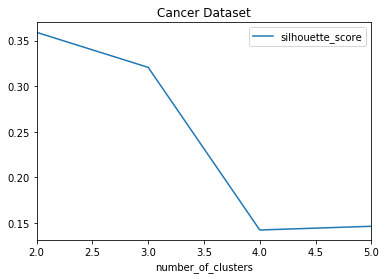

In [407]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

In [408]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_wine, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 5 clusters is 0.07859205180635795


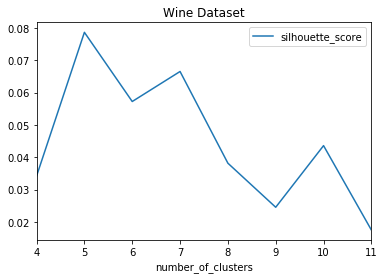

In [409]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## Experiment 2

## PCA

In [478]:
from sklearn.decomposition import PCA
def pca_best_number_of_components(train):
    df = []
    for n in range(1, train.shape[1]):
        pca = PCA(n_components=n).fit(train)
        total_explained_variance = sum(vs.pca_results(train, pca)['Explained Variance'])
        df.append({'number_of_components': n, 'total_explained_variance': total_explained_variance})
        if total_explained_variance >= 0.85:
            return n, total_explained_variance, pca, df

It is good to pick 5 components, which goves the total explained variance of 0.8775


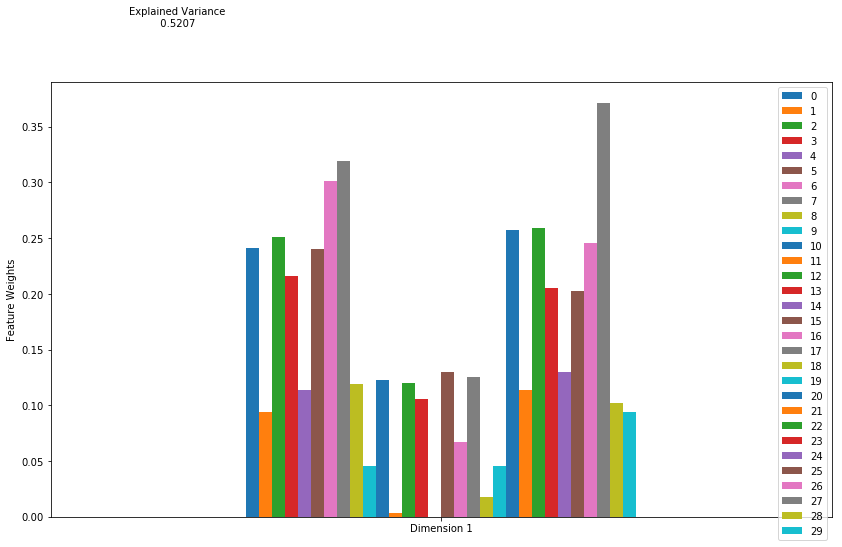

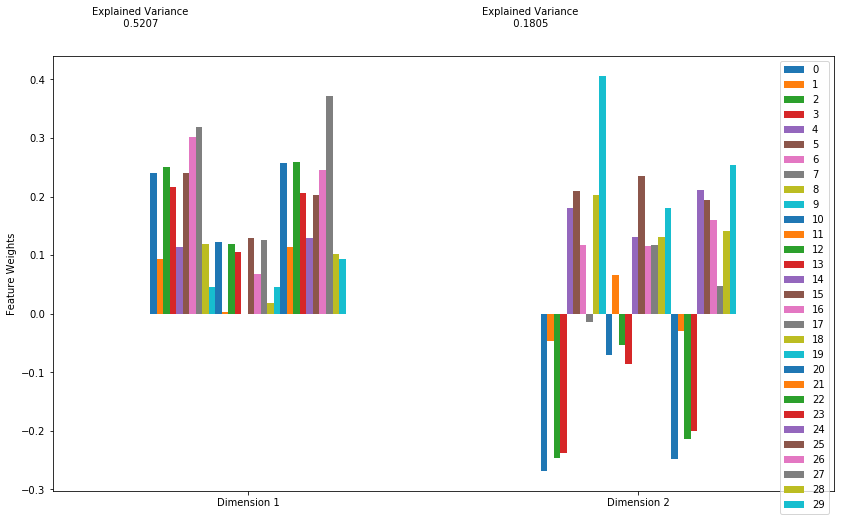

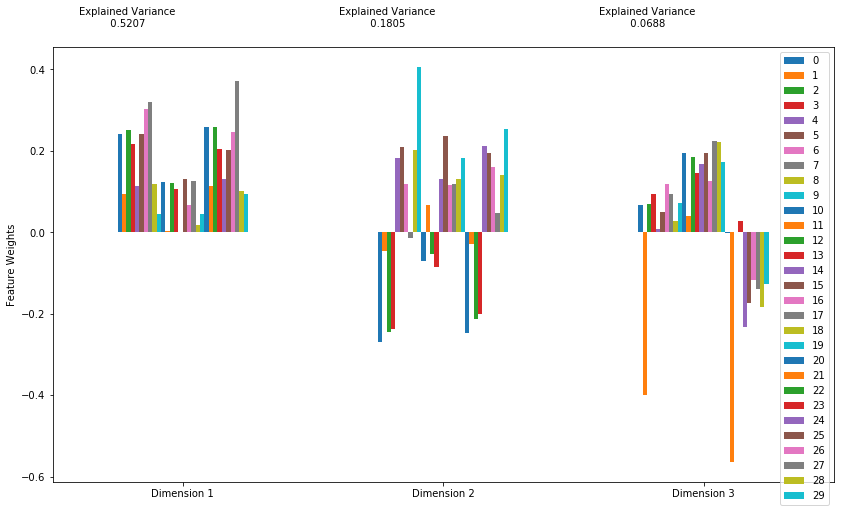

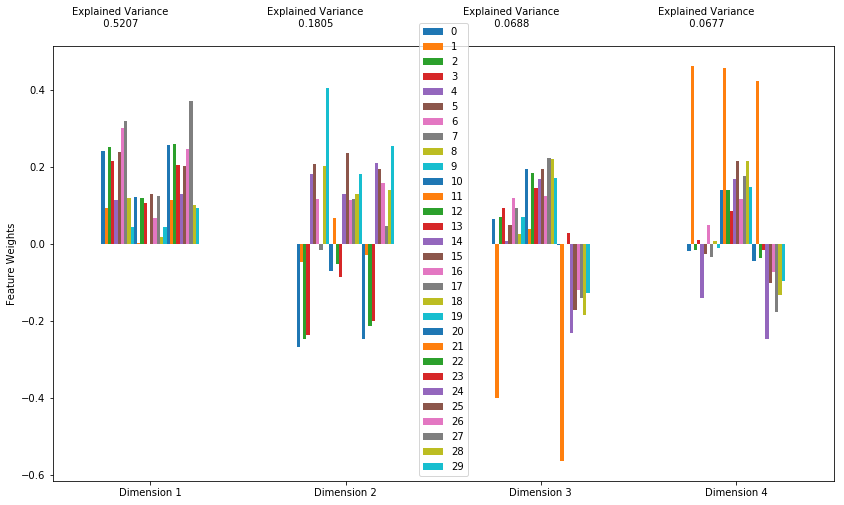

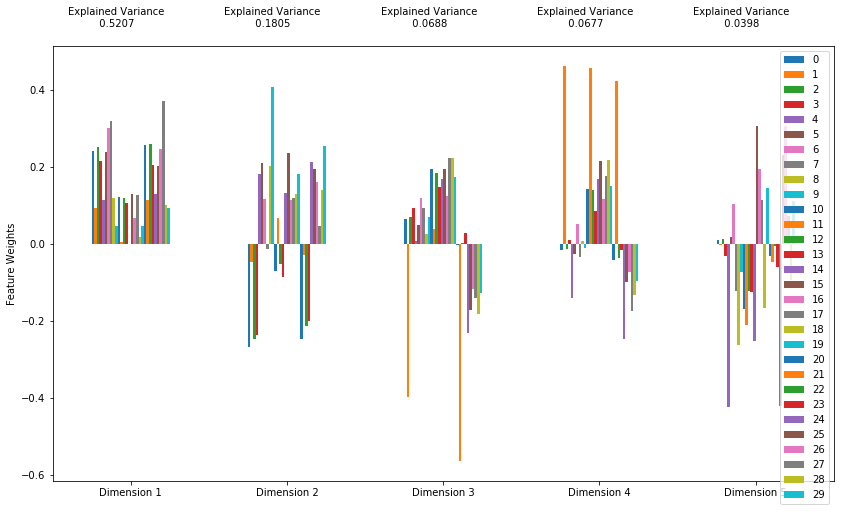

In [479]:
# Cancer Data
n, total_explained_variance, best_pca, trend = pca_best_number_of_components(X_train_cancer)
print "It is good to pick " + str(n) + " components, which goves the total explained variance of " + str(total_explained_variance)

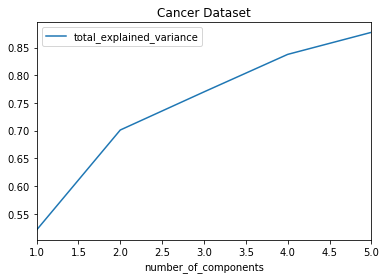

In [480]:
pd.DataFrame(trend).plot(x='number_of_components',y='total_explained_variance', title="Cancer Dataset")

In [481]:
X_train_cancer_pca = pd.DataFrame(best_pca.transform(X_train_cancer), columns = ['Dimension ' + str(i) for i in range(1,n+1)])
X_test_cancer_pca = pd.DataFrame(best_pca.transform(X_test_cancer), columns = ['Dimension ' + str(i) for i in range(1,n+1)])

It is good to pick 6 components, which goves the total explained variance of 0.8779


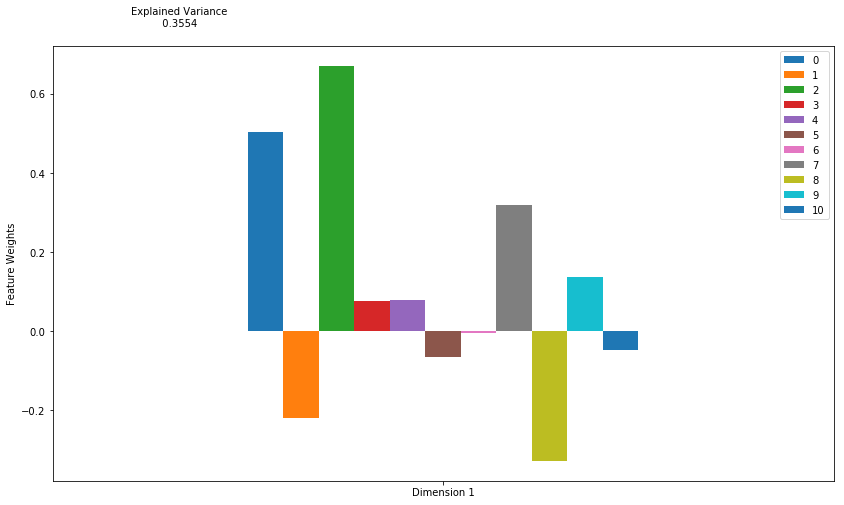

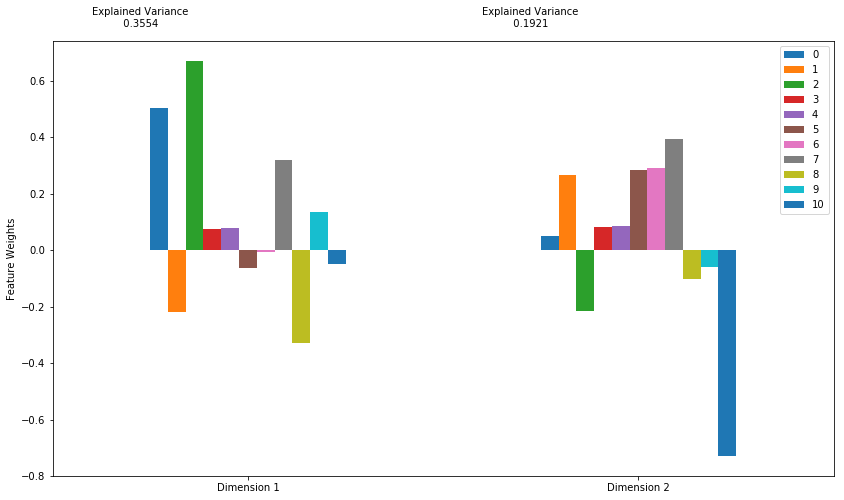

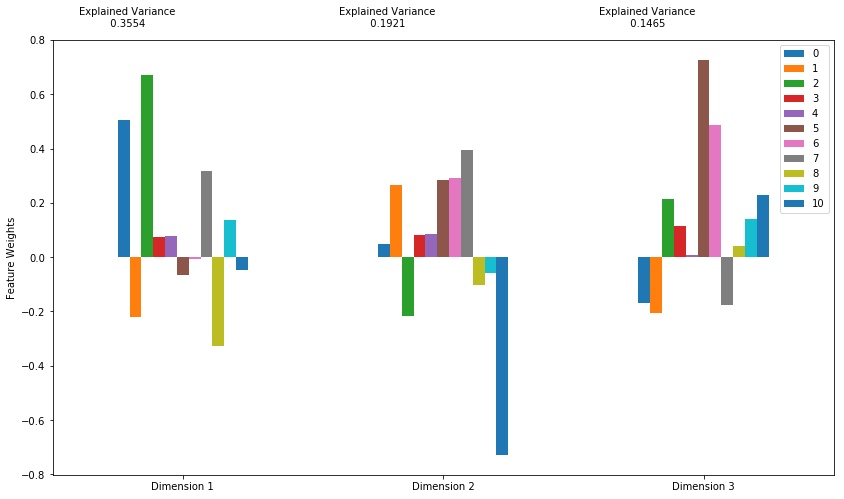

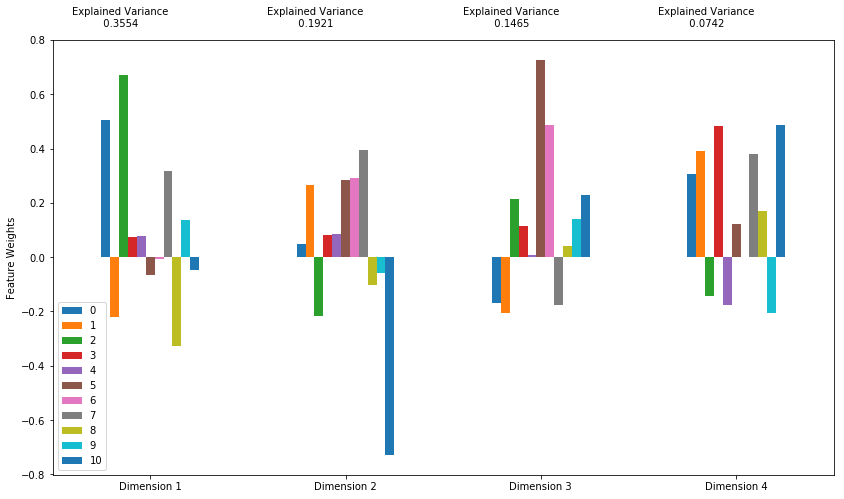

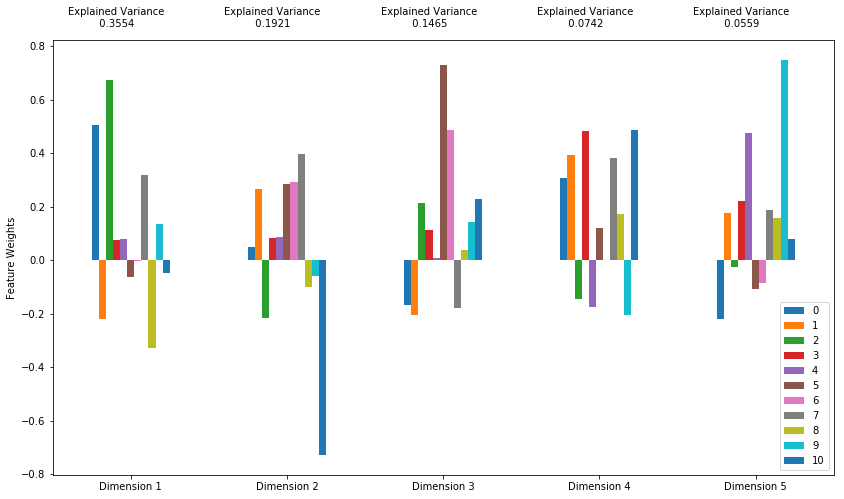

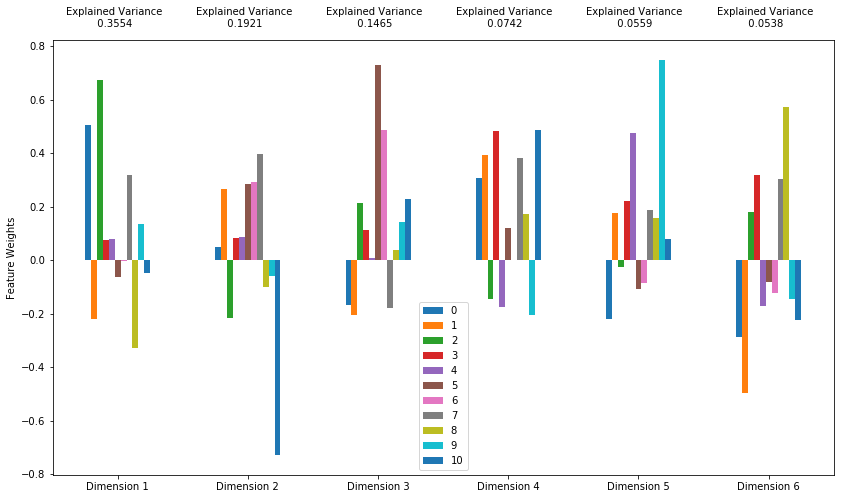

In [482]:
# Wine Data
n, total_explained_variance, best_pca, trend = pca_best_number_of_components(X_train_wine)
print "It is good to pick " + str(n) + " components, which goves the total explained variance of " + str(total_explained_variance)

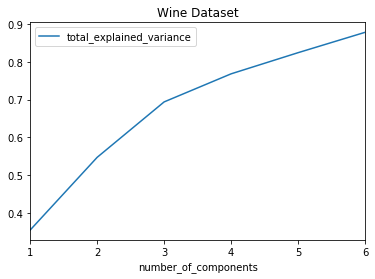

In [483]:
pd.DataFrame(trend).plot(x='number_of_components',y='total_explained_variance', title="Wine Dataset")

In [484]:
X_train_wine_pca = pd.DataFrame(best_pca.transform(X_train_wine), columns = ['Dimension ' + str(i) for i in range(1,n+1)])
X_test_wine_pca = pd.DataFrame(best_pca.transform(X_test_wine), columns = ['Dimension ' + str(i) for i in range(1,n+1)])
X_all_wine_pca = pd.DataFrame(best_pca.transform(norm_wine_data), columns = ['Dimension ' + str(i) for i in range(1,n+1)])

## ICA

In [485]:
from sklearn.decomposition import FastICA
def ica_best_number_of_components(train):
    df = []
    max_kurtosis = float('-inf')
    max_diff = 0
    last_kurtosis = None
    for n in range(1, train.shape[1]):
        transformer = FastICA(n_components=n).fit(train)
        average_kurtosis = np.mean(pd.DataFrame(transformer.transform(train)).kurtosis())
        if average_kurtosis > max_kurtosis:
            if last_kurtosis:
                temp_diff = average_kurtosis - last_kurtosis
                if temp_diff > max_diff:
                    max_diff = temp_diff
                    max_kurtosis = average_kurtosis
                    best_ica = transformer
                    best_n = n
            else:
                max_kurtosis = average_kurtosis
                best_ica = transformer
                best_n = n
        last_kurtosis = average_kurtosis
        df.append({'number_of_components': n, 'average_kurtosis_score': average_kurtosis})
    return best_n, max_kurtosis, best_ica, df

In [486]:
# Cancer Data
n, max_kustosis, best_ica, trend = ica_best_number_of_components(X_train_cancer)
print "It is good to pick " + str(n) + " components, which gives maximum hike in average kurtosis of " + str(max_kustosis)

It is good to pick 23 components, which gives maximum hike in average kurtosis of 30.019642669506858


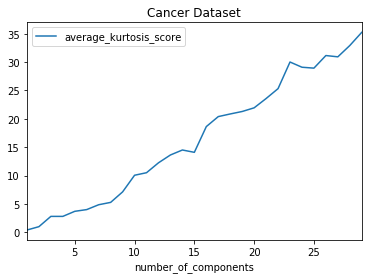

In [487]:
pd.DataFrame(trend).plot(x='number_of_components',y='average_kurtosis_score', title="Cancer Dataset")

In [488]:
X_train_cancer_ica = pd.DataFrame(best_ica.transform(X_train_cancer), columns = ['Dimension ' + str(i) for i in range(1,n+1)])
X_test_cancer_ica = pd.DataFrame(best_ica.transform(X_test_cancer), columns = ['Dimension ' + str(i) for i in range(1,n+1)])

In [489]:
# Wine Data
n, max_kustosis, best_ica, trend = ica_best_number_of_components(X_train_wine)
print "It is good to pick " + str(n) + " components, which gives maximum hike in average kurtosis of " + str(max_kustosis)

It is good to pick 5 components, which gives maximum hike in average kurtosis of 5.5429743921926


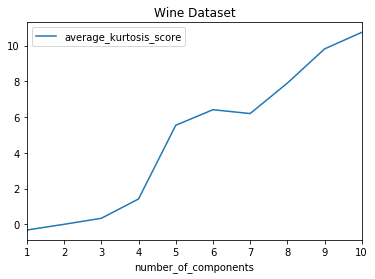

In [490]:
pd.DataFrame(trend).plot(x='number_of_components',y='average_kurtosis_score', title="Wine Dataset")

In [491]:
X_train_wine_ica = pd.DataFrame(best_ica.transform(X_train_wine), columns = ['Dimension ' + str(i) for i in range(1,n+1)])
X_test_wine_ica = pd.DataFrame(best_ica.transform(X_test_wine), columns = ['Dimension ' + str(i) for i in range(1,n+1)])
X_all_wine_ica = pd.DataFrame(best_ica.transform(norm_wine_data), columns = ['Dimension ' + str(i) for i in range(1,n+1)])

## Randomized Projections

In [493]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.random_projection import SparseRandomProjection
def random_best_number_of_components(train, y):
    accuracies = []
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)
    for n in range(1, train.shape[1]):
        sp = SparseRandomProjection(n_components = n, random_state=42)
        X = sp.fit_transform(X_train)
        model = LinearSVC()
        model.fit(X, y_train)
        
        test = sp.transform(X_test)
        accuracy = metrics.accuracy_score(model.predict(test), y_test)
        accuracies.append({'number_of_components': n, 'accuracy': accuracy})
    return accuracies

In [494]:
# Cancer Data
accuracies = random_best_number_of_components(X_train_cancer, y_train_cancer)
max_accuracies = [x['accuracy'] for x in accuracies]
best_accuracy, best_n = np.max(max_accuracies), np.argmax(max_accuracies) + 1
print "It is good to pick " + str(best_n) + " components, which gives best accuracy on linear SVC of " + str(best_accuracy)

It is good to pick 18 components, which gives best accuracy on linear SVC of 0.967032967032967


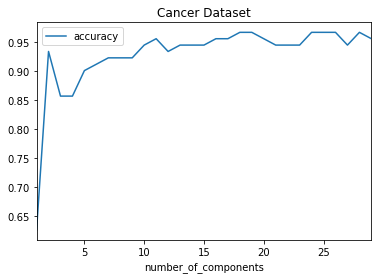

In [495]:
pd.DataFrame(accuracies).plot(x='number_of_components',y='accuracy', title="Cancer Dataset")

In [496]:
best_random = SparseRandomProjection(n_components = best_n, random_state=42).fit(X_train_cancer)
X_train_cancer_random = pd.DataFrame(best_random.transform(X_train_cancer), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])
X_test_cancer_random = pd.DataFrame(best_random.transform(X_test_cancer), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])

In [497]:
# Wine Data
accuracies = random_best_number_of_components(X_train_wine, y_train_wine)
max_accuracies = [x['accuracy'] for x in accuracies]
best_accuracy, best_n = np.max(max_accuracies), np.argmax(max_accuracies) + 1
print "It is good to pick " + str(best_n) + " components, which gives best accuracy on linear SVC of " + str(best_accuracy)

It is good to pick 8 components, which gives best accuracy on linear SVC of 0.6328125


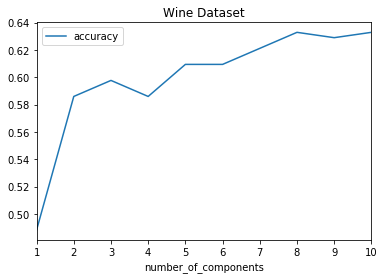

In [498]:
pd.DataFrame(accuracies).plot(x='number_of_components',y='accuracy', title="Wine Dataset")

In [500]:
best_random = SparseRandomProjection(n_components = best_n, random_state=42).fit(X_train_wine)
X_train_wine_random = pd.DataFrame(best_random.transform(X_train_wine), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])
X_test_wine_random = pd.DataFrame(best_random.transform(X_test_wine), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])
X_all_wine_random = pd.DataFrame(best_random.transform(norm_wine_data), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])

## FA

In [501]:
from sklearn.decomposition import FactorAnalysis
def fa_best_number_of_components(train, y):
    accuracies = []
    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)
    for n in range(1, train.shape[1]):
        sp = FactorAnalysis(n_components = n, random_state=42)
        X = sp.fit_transform(X_train)
        model = LinearSVC()
        model.fit(X, y_train)
        
        test = sp.transform(X_test)
        accuracy = metrics.accuracy_score(model.predict(test), y_test)
        accuracies.append({'number_of_components': n, 'accuracy': accuracy})
    return accuracies

In [502]:
# Cancer Data
accuracies = fa_best_number_of_components(X_train_cancer, y_train_cancer)
max_accuracies = [x['accuracy'] for x in accuracies]
best_accuracy, best_n = np.max(max_accuracies), np.argmax(max_accuracies)
print "It is good to pick " + str(best_n) + " components, which gives best accuracy on linear SVC of " + str(best_accuracy)

It is good to pick 20 components, which gives best accuracy on linear SVC of 0.9781021897810219


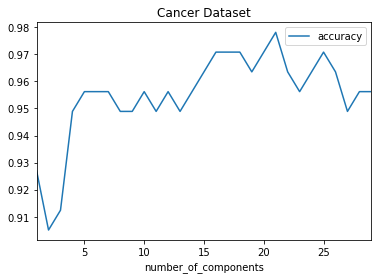

In [503]:
pd.DataFrame(accuracies).plot(x='number_of_components',y='accuracy', title="Cancer Dataset")

In [504]:
best_fa = FactorAnalysis(n_components = best_n, random_state=42).fit(X_train_cancer)
X_train_cancer_fa = pd.DataFrame(best_fa.transform(X_train_cancer), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])
X_test_cancer_fa = pd.DataFrame(best_fa.transform(X_test_cancer), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])

In [505]:
# Wine Data
accuracies = fa_best_number_of_components(X_train_wine, y_train_wine)
max_accuracies = [x['accuracy'] for x in accuracies]
best_accuracy, best_n = np.max(max_accuracies), np.argmax(max_accuracies) + 1
print "It is good to pick " + str(best_n) + " components, which gives best accuracy on linear SVC of " + str(best_accuracy)

It is good to pick 9 components, which gives best accuracy on linear SVC of 0.6067708333333334


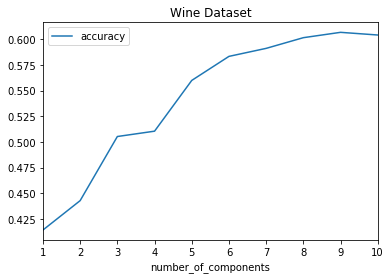

In [506]:
pd.DataFrame(accuracies).plot(x='number_of_components',y='accuracy', title="Wine Dataset")

In [507]:
best_fa = FactorAnalysis(n_components = best_n, random_state=42).fit(X_train_wine)
X_train_wine_fa = pd.DataFrame(best_fa.transform(X_train_wine), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])
X_test_wine_fa = pd.DataFrame(best_fa.transform(X_test_wine), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])
X_all_wine_fa = pd.DataFrame(best_fa.transform(norm_wine_data), columns = ['Dimension ' + str(i) for i in range(1,best_n+1)])

# Experiment 3

## K-means PCA Cancer Dataset

In [366]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_cancer_pca, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.42865066873186647


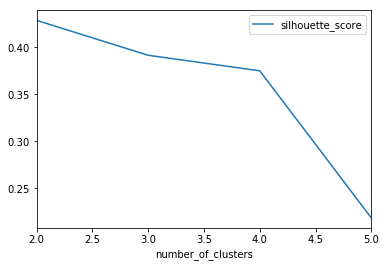

In [367]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## K-means PCA Wine Dataset

In [368]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_wine_pca, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 6 clusters is 0.2453984020233732


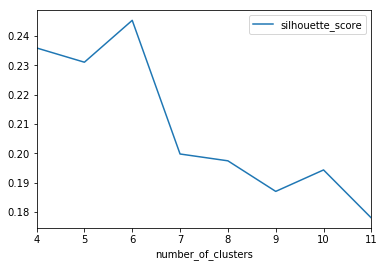

In [369]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## K-means ICA Cancer Dataset

In [370]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_cancer_ica, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.14153653973625144


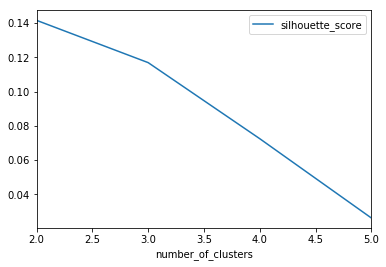

In [371]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## K-means ICA Wine Dataset

In [372]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_wine_ica, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 6 clusters is 0.22400373721274894


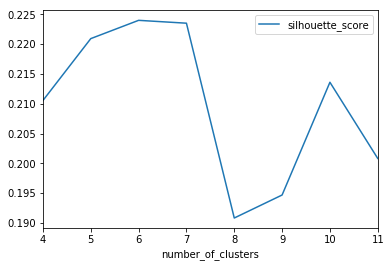

In [373]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## K-means Random Cancer Dataset

In [374]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_cancer_random, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.3563921409844044


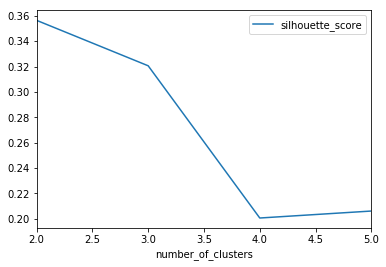

In [375]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## K-means Random Wine Dataset

In [376]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_wine_random, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 5 clusters is 0.2546099944032468


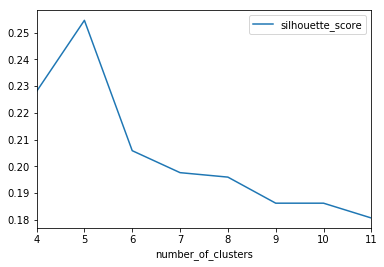

In [377]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## K-means FA Cancer Dataset

In [378]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_cancer_fa, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 3 clusters is 0.14068403762738524


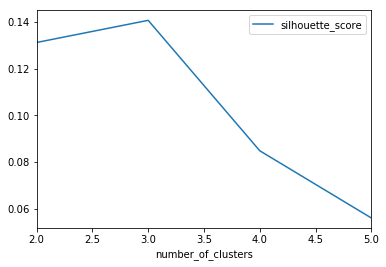

In [379]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## K-means FA Wine Dataset

In [380]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_wine_fa, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 9 clusters is 0.15615308680872936


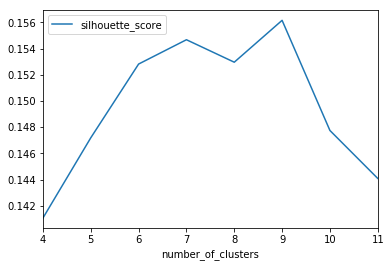

In [381]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## EM PCA Cancer Dataset 

In [382]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_cancer_pca, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.28554299887617546


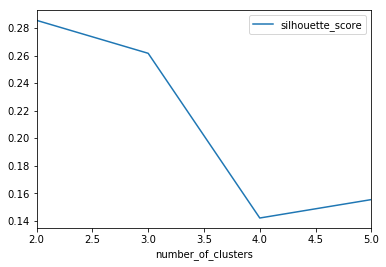

In [383]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## EM PCA Wine Dataset

In [384]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_wine_pca, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 6 clusters is 0.1609078148478398


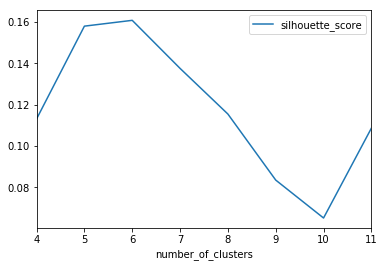

In [385]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## EM ICA Cancer Dataset

In [386]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_cancer_ica, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 3 clusters is 0.18809765334299144


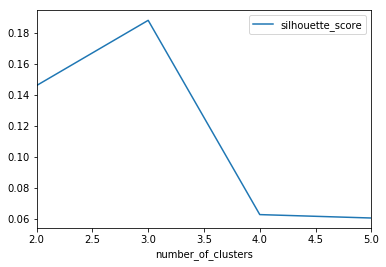

In [387]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## EM ICA Wine Dataset

In [388]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_wine_ica, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 6 clusters is 0.16660632599484693


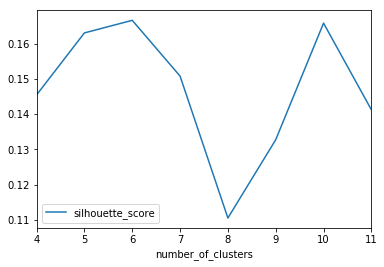

In [389]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## EM Random Cancer Dataset

In [390]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_cancer_random, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 2 clusters is 0.3333971982014473


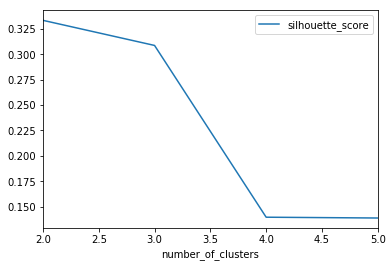

In [391]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## EM Random Wine Dataset

In [392]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_wine_random, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 4 clusters is 0.1280846439739912


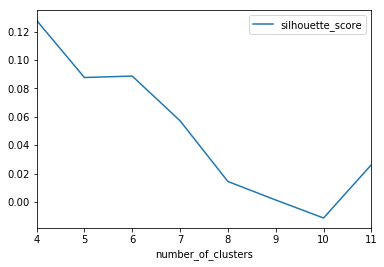

In [393]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

## EM FA Cancer Dataset

In [394]:
# Cancer data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_cancer_fa, 2, 6)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 3 clusters is 0.1120628519029424


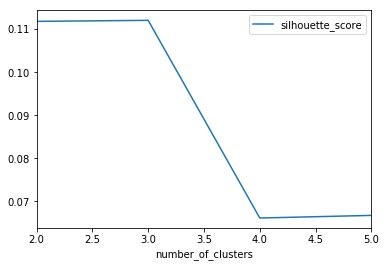

In [395]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Cancer Dataset")

## EM FA Wine Dataset

In [396]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_wine_fa, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 4 clusters is 0.09896174683644247


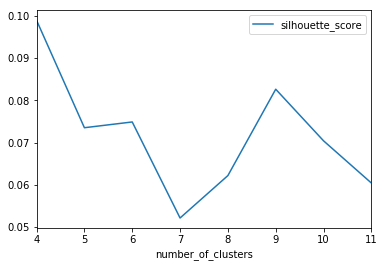

In [397]:
pd.DataFrame(trend).plot(x='number_of_clusters',y='silhouette_score', title="Wine Dataset")

# Experiment 4

## Wine Dataset

In [469]:
from time import time
from sklearn.metrics import accuracy_score
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, average='weighted')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("Accuracy score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("Accuracy score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [508]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [470]:
clf = MLPClassifier(activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = 100, solver = 'lbfgs')

In [553]:
# Without transformation
train_predict(clf, X_train_wine, y_train_wine, X_test_wine, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 3.5226 seconds
Made predictions in 0.0592 seconds.
Accuracy score for training set: 0.6446.
Made predictions in 0.0180 seconds.
Accuracy score for test set: 0.5701.


In [471]:
# PCA
train_predict(clf, X_train_wine_pca, y_train_wine, X_test_wine_pca, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .


/Users/aman/anaconda3/envs/py22/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trained model in 1.3264 seconds
Made predictions in 0.0083 seconds.
Accuracy score for training set: 0.6206.
Made predictions in 0.0032 seconds.
Accuracy score for test set: 0.5243.


/Users/aman/anaconda3/envs/py22/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<module 'matplotlib.pyplot' from '/Users/aman/anaconda3/envs/py22/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

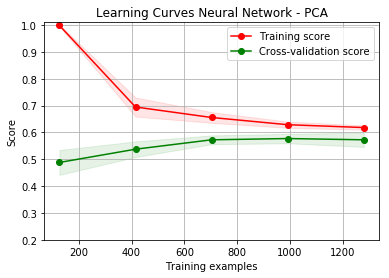

In [510]:
title = "Learning Curves Neural Network - PCA"
plot_learning_curve(clf, title,X_all_wine_pca, y_wine, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

In [472]:
# ICA
train_predict(clf, X_train_wine_ica, y_train_wine, X_test_wine_ica, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 1.1274 seconds
Made predictions in 0.0048 seconds.
Accuracy score for training set: 0.5519.
Made predictions in 0.0038 seconds.
Accuracy score for test set: 0.4918.


<module 'matplotlib.pyplot' from '/Users/aman/anaconda3/envs/py22/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

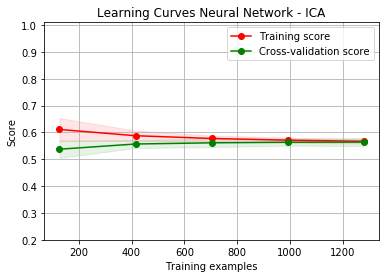

In [511]:
title = "Learning Curves Neural Network - ICA"
plot_learning_curve(clf, title,X_all_wine_ica, y_wine, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

In [473]:
# RP
train_predict(clf, X_train_wine_random, y_train_wine, X_test_wine_random, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 1.1761 seconds
Made predictions in 0.0075 seconds.
Accuracy score for training set: 0.6169.
Made predictions in 0.0047 seconds.
Accuracy score for test set: 0.5447.


<module 'matplotlib.pyplot' from '/Users/aman/anaconda3/envs/py22/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

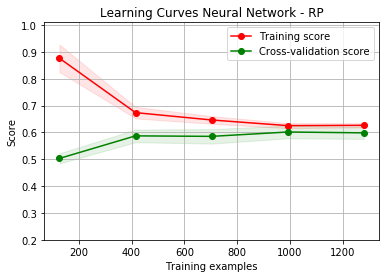

In [512]:
title = "Learning Curves Neural Network - RP"
plot_learning_curve(clf, title,X_all_wine_random, y_wine, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

In [474]:
# FA
train_predict(clf, X_train_wine_fa, y_train_wine, X_test_wine_fa, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 1.0518 seconds
Made predictions in 0.0056 seconds.
Accuracy score for training set: 1.0000.
Made predictions in 0.0038 seconds.
Accuracy score for test set: 0.6278.


<module 'matplotlib.pyplot' from '/Users/aman/anaconda3/envs/py22/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

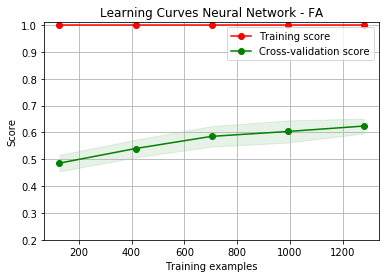

In [513]:
title = "Learning Curves Neural Network - FA"
plot_learning_curve(clf, title,X_all_wine_fa, y_wine, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

# Experiment 5

## K-means

In [567]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_kmeans_cluster(X_train_wine, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 6 clusters is 0.2062096478859651


In [568]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

preds_training = best_clusterer.predict(X_train_wine)
transformer = ohe.fit(preds_training.reshape(-1,1))
new_training_wine = ohe.transform(preds_training.reshape(-1,1))

preds_test = best_clusterer.predict(X_test_wine)
new_testing_wine = ohe.transform(preds_test.reshape(-1,1))

### Training with just the cluster prediction

In [559]:
train_predict(clf, new_training_wine, y_train_wine, new_testing_wine, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 0.5255 seconds
Made predictions in 0.0051 seconds.
Accuracy score for training set: 0.5093.
Made predictions in 0.0020 seconds.
Accuracy score for test set: 0.4759.


### Training with all attributes plus one extra cluster prediction

In [569]:
new_training_wine = X_train_wine.copy()
new_testing_wine = X_test_wine.copy()
new_training_wine[11] = preds_training
new_testing_wine[11] = preds_test

In [570]:
train_predict(clf, new_training_wine, y_train_wine, new_testing_wine, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 1.3519 seconds
Made predictions in 0.0060 seconds.
Accuracy score for training set: 0.6290.
Made predictions in 0.0030 seconds.
Accuracy score for test set: 0.5667.


## EM

In [562]:
# Wine data
best_score, best_number_clusters, best_clusterer, trend = get_best_em_cluster(X_train_wine, 4, 12)
print ("best silhouette_score for " + str(best_number_clusters) + " clusters is " + str(best_score))

best silhouette_score for 5 clusters is 0.07859205180635795


In [563]:
ohe = OneHotEncoder(sparse=False)

preds_training = best_clusterer.predict(X_train_wine)
transformer = ohe.fit(preds_training.reshape(-1,1))
new_training_wine = ohe.transform(preds_training.reshape(-1,1))

preds_test = best_clusterer.predict(X_test_wine)
new_testing_wine = ohe.transform(preds_test.reshape(-1,1))

### Training with just the cluster prediction

In [564]:
train_predict(clf, new_training_wine, y_train_wine, new_testing_wine, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 0.4359 seconds
Made predictions in 0.0030 seconds.
Accuracy score for training set: 0.4984.
Made predictions in 0.0012 seconds.
Accuracy score for test set: 0.4328.


### Training with all attributes plus one extra cluster prediction


In [565]:
new_training_wine = X_train_wine.copy()
new_testing_wine = X_test_wine.copy()
new_training_wine[11] = preds_training
new_testing_wine[11] = preds_test

In [566]:
train_predict(clf, new_training_wine, y_train_wine, new_testing_wine, y_test_wine)

Training a MLPClassifier using a training set size of 1279. . .
Trained model in 4.4420 seconds
Made predictions in 0.0053 seconds.
Accuracy score for training set: 0.6448.
Made predictions in 0.0026 seconds.
Accuracy score for test set: 0.5525.
